Ranking the rules

In [3]:
import pandas as pd
df = pd.read_csv('final_dataset.csv')
df.head()


,_id,user_id,review_count,review_id,text,date,stars,useful,funny,sentiment_score,...,rule5_threshold,rule2_threshold,rule4_threshold,rule3_threshold,similarity_score,rule6_threshold,count_ones,target,funny_threshold,star_threshold
0,661a5d4bee4d349db0518760,qVc8ODYU5SZjKXVBgXdI7w,585,Egy2a4qZeXGr2aY6KMxxbg,Remarkable food with beach access for the whol...,2017-05-09 23:21:36,5,0,0,0.405455,...,0,0,1,1,1.0,1,4,genuine,0,1
1,661a5d4bee4d349db0518761,qVc8ODYU5SZjKXVBgXdI7w,585,01vN0q6aMlFio6HAjLZz7Q,I loved everything about this lovely train sta...,2009-05-01 02:00:03,5,30,7,0.598016,...,1,0,1,1,1.0,1,5,genuine,1,1
2,661a5d4bee4d349db0518762,j14WgRoU_-2ZE1aw1dXrJg,4333,iMpqDa0Oyukiw5406KYNRw,The Praline Connection makes a mean po' boy. ...,2010-10-11 19:24:56,3,3,1,0.024826,...,1,1,1,1,1.0,1,5,fake,1,0
3,661a5d4bee4d349db0518763,j14WgRoU_-2ZE1aw1dXrJg,4333,3pCHQ8YHkuaZFFAEz7pz6A,"We walked over to Tennessee Brew Works, one of...",2018-10-23 14:24:32,4,12,5,0.144998,...,1,1,1,1,1.0,1,6,genuine,1,1
4,661a5d4bee4d349db0518764,j14WgRoU_-2ZE1aw1dXrJg,4333,FvTfqugdlzQSvFB1RAafNQ,"Logan Circle, also known as Logan Square, is a...",2019-08-04 12:29:33,4,5,0,0.140657,...,1,1,1,1,1.0,1,6,genuine,0,1


In [4]:
df.columns

Index(['_id', 'user_id', 'review_count', 'review_id', 'text', 'date', 'stars',
       'useful', 'funny', 'sentiment_score', 'rule1_threshold',
       'rule5_threshold', 'rule2_threshold', 'rule4_threshold',
       'rule3_threshold', 'similarity_score', 'rule6_threshold', 'count_ones',
       'target', 'funny_threshold', 'star_threshold'],
      dtype='object')

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('final_dataset.csv')

# Drop the remaining columns
columns_to_keep = ['user_id', 'review_id', 'text', 'date', 'stars', 'useful', 'funny', 'target']
df.drop(columns=df.columns.difference(columns_to_keep), inplace=True)

df.to_csv('final_dataset.csv', index=False)


In [9]:
df.columns

Index(['user_id', 'review_id', 'text', 'date', 'stars', 'useful', 'funny',
       'target'],
      dtype='object')

Naives Bayes

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('final_dataset.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features (text) and target
X = data['text']
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Convert text data to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict the target variable on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other metrics
print(classification_report(y_test, y_pred))



Accuracy: 0.7817994762439207
              precision    recall  f1-score   support

        fake       1.00      0.00      0.00      4667
     genuine       0.78      1.00      0.88     16717

    accuracy                           0.78     21384
   macro avg       0.89      0.50      0.44     21384
weighted avg       0.83      0.78      0.69     21384



Multi Class label Training(Naives Bayes)

Accuracy: 0.7818930041152263
              precision    recall  f1-score   support

        fake       1.00      0.00      0.00      4667
     genuine       0.78      1.00      0.88     16717

    accuracy                           0.78     21384
   macro avg       0.89      0.50      0.44     21384
weighted avg       0.83      0.78      0.69     21384



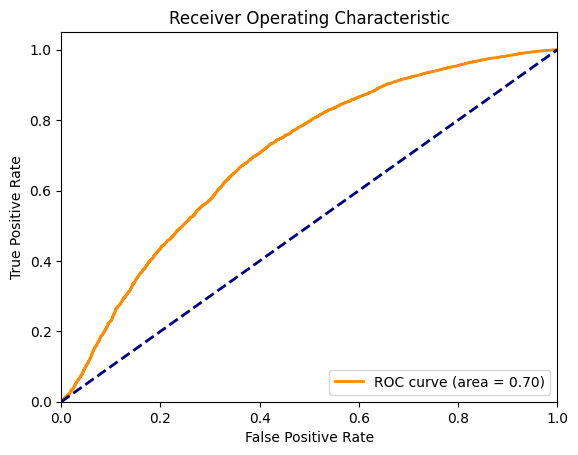

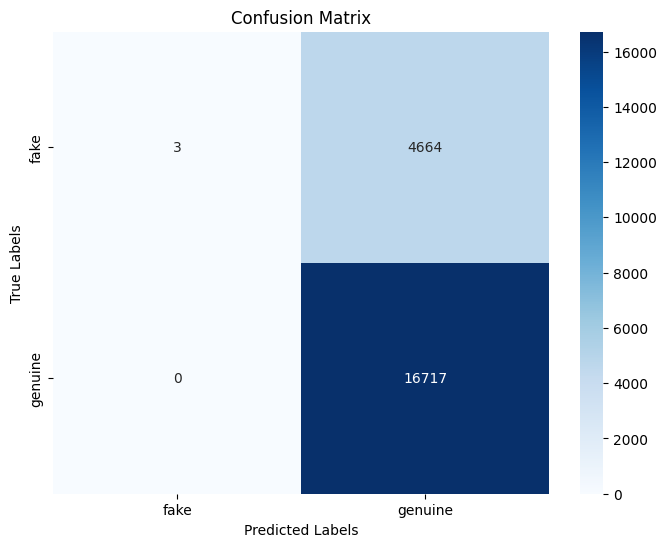

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to select specific attributes
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute):
        self.attribute = attribute

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute]

# Load the dataset
data = pd.read_csv('final_dataset.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features and target
X = data[['text', 'useful', 'funny']]
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[
            ('text_pipeline', Pipeline([
                ('selector', AttributeSelector(attribute='text')),
                ('vectorizer', TfidfVectorizer())
            ])),
            ('numeric_pipeline', Pipeline([
                ('selector', AttributeSelector(attribute=['useful', 'funny']))
            ]))
        ]
    )),
    ('classifier', MultinomialNB())
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other metrics
print(classification_report(y_test, y_pred))
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encode labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate ROC curve
y_score = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



SVM Single label training

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('final_dataset.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features (text) and target
X = data['text']
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', HashingVectorizer(n_features=2**18)),
    ('classifier', LinearSVC())
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other metrics
print(classification_report(y_test, y_pred))


c:\Users\Shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy: 0.8228582117471006
              precision    recall  f1-score   support

        fake       0.65      0.40      0.50      4667
     genuine       0.85      0.94      0.89     16717

    accuracy                           0.82     21384
   macro avg       0.75      0.67      0.69     21384
weighted avg       0.81      0.82      0.81     21384



SVM Multi label Training

c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Accuracy: 0.8273475495697717
              precision    recall  f1-score   support

        fake       0.68      0.40      0.50      4667
     genuine       0.85      0.95      0.90     16717

    accuracy                           0.83     21384
   macro avg       0.76      0.67      0.70     21384
weighted avg       0.81      0.83      0.81     21384



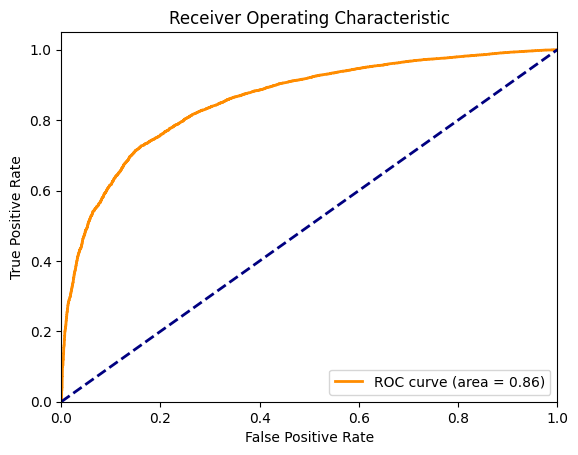

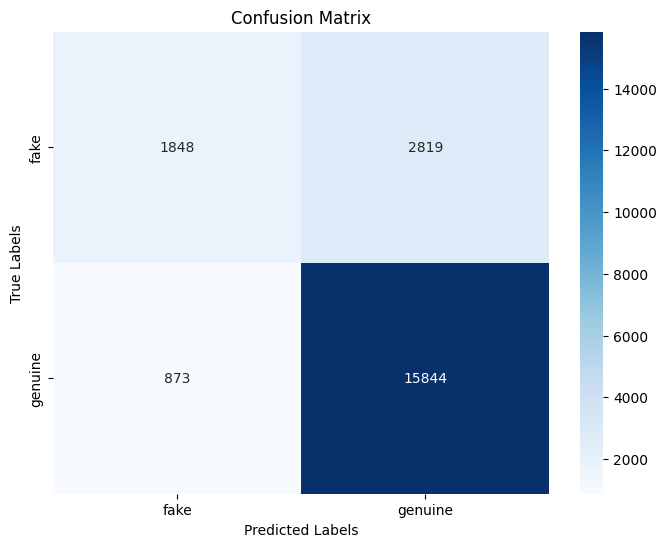

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Custom transformer to select specific attributes
class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute):
        self.attribute = attribute

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute]

# Load the dataset
data = pd.read_csv('final_dataset.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features and target
X = data[['text', 'useful', 'funny']]
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Define the pipeline with CalibratedClassifierCV
pipeline = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[
            ('text_pipeline', Pipeline([
                ('selector', AttributeSelector(attribute='text')),
                ('vectorizer', HashingVectorizer(n_features=2**18))
            ])),
            ('numeric_pipeline', Pipeline([
                ('selector', AttributeSelector(attribute=['useful', 'funny']))
            ]))
        ]
    )),
    ('classifier', CalibratedClassifierCV(LinearSVC()))
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other metrics
print(classification_report(y_test, y_pred))

# Encode labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Calculate ROC curve
y_score = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


CNN SINGLE CLASS


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('final_dataset.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features (text) and target
X = data['text']
y = data['target']

# Convert string labels to binary labels
y_binary = (y == 'positive').astype(int)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = 100  # adjust this based on your data
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length, padding='post', truncating='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_binary, test_size=0.4, random_state=42)

# Define the CNN model
embedding_dim = 100  # adjust this based on your data
vocab_size = len(tokenizer.word_index) + 1  # add 1 for padding token
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate other metrics
print(classification_report(y_test, y_pred))


c:\Users\Shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 122s 133ms/step - accuracy: 0.9918 - loss: 0.0454 - val_accuracy: 1.0000 - val_loss: 1.3637e-06
Epoch 2/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - accuracy: 1.0000 - loss: 8.8025e-07 - val_accuracy: 1.0000 - val_loss: 3.1007e-07
Epoch 3/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 112s 124ms/step - accuracy: 1.0000 - loss: 2.2173e-07 - val_accuracy: 1.0000 - val_loss: 1.2307e-07
Epoch 4/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 1.0000 - loss: 7.7338e-08 - val_accuracy: 1.0000 - val_loss: 5.8558e-08
Epoch 5/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 105s 116ms/step - accuracy: 1.0000 - loss: 4.9412e-08 - val_accuracy: 1.0000 - val_loss: 3.1262e-08
Epoch 6/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 1.0000 - loss: 2.6192e-08 - val_accuracy: 1.0000 - val_loss: 1.7782e-08
Epoch 7/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 113s 125ms/step - accuracy: 1.0000 - loss: 1.3342e-08 - val_accuracy: 1.0000 - val_loss: 1.0473e-08
Epoch 8/10
903/903 ━━━━━

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


CNN Multi Label

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Concatenate
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('final_dataset.csv')

data.dropna(inplace=True)


X_text = data['text']
X_numeric = data[['useful', 'funny']]
y = data['target']


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text)
X_seq = tokenizer.texts_to_sequences(X_text)


max_sequence_length = 100  
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length, padding='post', truncating='post')


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)


X_combined = Concatenate()([X_padded, X_numeric_scaled])


X_combined_np = np.array(X_combined)
y_encoded_np = np.array(y_encoded)


X_train, X_test, y_train, y_test = train_test_split(X_combined_np, y_encoded_np, test_size=0.4, random_state=42)


embedding_dim = 100 
vocab_size = len(tokenizer.word_index) + 1 
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print(classification_report(y_test, y_pred))

Epoch 1/10


c:\Users\Shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


903/903 ━━━━━━━━━━━━━━━━━━━━ 111s 121ms/step - accuracy: 0.7815 - loss: 0.4859 - val_accuracy: 0.8167 - val_loss: 0.4105
Epoch 2/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.8608 - loss: 0.3163 - val_accuracy: 0.8117 - val_loss: 0.4229
Epoch 3/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.9554 - loss: 0.1305 - val_accuracy: 0.8114 - val_loss: 0.6969
Epoch 4/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.9946 - loss: 0.0260 - val_accuracy: 0.7943 - val_loss: 0.8024
Epoch 5/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 102s 113ms/step - accuracy: 0.9994 - loss: 0.0057 - val_accuracy: 0.8052 - val_loss: 1.0225
Epoch 6/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 104s 116ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.8036 - val_loss: 1.0727
Epoch 7/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 0.9998 - loss: 0.0030 - val_accuracy: 0.8021 - val_loss: 1.1025
Epoch 8/10
903/903 ━━━━━━━━━━━━━━━━━━━━ 100s 111ms/step - accuracy: 1.0000 - loss: 6.65